In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data();

In [3]:
ytrain=to_categorical(ytrain,10);
ytest=to_categorical(ytest,10);

In [4]:
xtrain=xtrain/255;
xtest=xtest/255;

In [5]:
xtrain=xtrain.reshape(xtrain.shape[0],784)
xtest=xtest.reshape(xtest.shape[0],784)

In [67]:
model=Sequential();
model.add(Dense(28*28,input_dim=28*28,activation = 'relu'));
model.add(Dense(28*28,activation='relu'));
#model.add(Dense(28*28,activation='relu'));
model.add(Dense(28*28,activation='relu'));
model.add(Dense(10,activation='softmax'));
model.compile(adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy']);

In [68]:
print(model.summary());

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
model.fit(xtrain,ytrain,validation_split=0,shuffle=0,epochs=10,batch_size=100,verbose=1);

Epoch 1/10
60000/60000 [==============================] - 44s 741us/step - loss: 0.5674 - acc: 0.8860
Epoch 2/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.2021 - acc: 0.9466
Epoch 3/10
60000/60000 [==============================] - 54s 904us/step - loss: 0.1819 - acc: 0.9517
Epoch 4/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.1518 - acc: 0.9596
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1392 - acc: 0.9639
Epoch 6/10
60000/60000 [==============================] - 58s 972us/step - loss: 0.1333 - acc: 0.9656
Epoch 7/10
60000/60000 [==============================] - 60s 994us/step - loss: 0.1231 - acc: 0.9679
Epoch 8/10
60000/60000 [==============================] - 52s 874us/step - loss: 0.1236 - acc: 0.9685
Epoch 9/10
60000/60000 [==============================] - 50s 833us/step - loss: 0.1140 - acc: 0.9697
Epoch 10/10
60000/60000 [==============================] - 50s 831us/step - loss: 0.

In [70]:
import cv2

(28, 28)


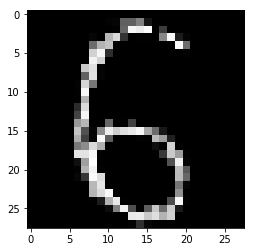

In [71]:
image=cv2.imread('6.jpg',cv2.IMREAD_GRAYSCALE);
image=cv2.bitwise_not(image);
image=image[50:380,230:560]
image=cv2.resize(image,(28,28))
print(image.shape);
plt.imshow(image,cmap='gray');

In [72]:
image=image/255;
image=image.reshape(1,28*28)

In [73]:
p=model.predict(image)

In [74]:
for i in range(0,10):
    print("%.5f"%p[0,i]); 

0.00306
0.00072
0.00001
0.00125
0.00262
0.31657
0.64972
0.00000
0.02034
0.00570


In [75]:
pr=model.predict_classes(image);

In [76]:
print(pr[0])

6


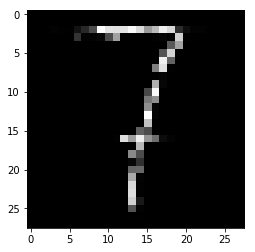

In [77]:
i=cv2.imread('7.jpg',cv2.IMREAD_GRAYSCALE);
i=i[60:400,230:570];
i=cv2.bitwise_not(i);
i=cv2.resize(i,(28,28))
plt.imshow(i,cmap='gray');

In [78]:
i=i/255;
im=i.reshape(1,28*28);

In [79]:
pred=model.predict(im);

In [80]:
for i in range(0,10):
    print("%.5f"%pred[0,i]); 

0.00069
0.56137
0.22261
0.00618
0.01069
0.00765
0.00617
0.11550
0.06876
0.00038


In [81]:
pre=model.predict_classes(im);
print(pre[0]);

1
